In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from IPython.display import display
from matplotlib.lines import Line2D
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')

In [58]:
def read_csv_files_from_folder(folder_path):
    # Initialize an empty list to store DataFrames
    dfs = []
    # Get a list of files in the folder
    file_list = os.listdir(folder_path)
    # Iterate through the files in the folder
    for file_name in file_list:
        # Check if the file has a .csv extension
        if file_name.endswith(".csv"):
            file_path = os.path.join(folder_path, file_name)

            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Append the DataFrame to the list
            dfs.append(df)

    # Concatenate all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

In [59]:
cols = ['dataset', 'method', 'fitness_rule', 'fitness', 'ACC', 'MCC', 'avg_odds_diff', 'stat_par_diff', 'eq_opp_diff']

In [60]:
results = read_csv_files_from_folder('../KBS_reviewed_submission/results/')
results.replace({'ftl_mlp_initializer': 'FTL', 'adversarial_debiasing_initializer': 'AD', 'gerry_fair_classifier_initializer': 'GFC', 'prejudice_remover_initializer': 'PR', 'simple_mlp_initializer': 'MLP', 'adaptative_priority_reweighting_classifier_initializer': 'APW'}, inplace=True)
results.replace({'adult_dataset_reader': 'Adult Income', 'compas_dataset_reader': 'Compas Recidivism', 'german_dataset_reader': 'German Credit', 'bank_dataset_reader': 'Bank Marketing'}, inplace=True)
results.rename(columns={'avg_odds_diff': 'Equalized Odds', 'stat_par_diff': 'Statistical Parity', 'eq_opp_diff': 'Equal Opportunity', 'MCC': 'Mathew Correlation', 'ACC': 'Accuracy'}, inplace=True)

In [61]:
display(results)

,Unnamed: 0,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity
0,2,Compas Recidivism,AD,mcc_parity,0.202105,0.663695,0.315930,0.095539,0.113825,0.059224
1,7,Compas Recidivism,AD,mcc_odds,0.220379,0.633712,0.259502,0.039123,0.024473,0.034721
2,12,Compas Recidivism,AD,mcc_opportunity,0.285652,0.660454,0.303159,0.010621,0.010864,0.017507
3,17,Compas Recidivism,AD,acc_parity,0.586824,0.666937,0.328174,0.049345,0.080113,0.019058
4,22,Compas Recidivism,AD,acc_odds,0.611710,0.676661,0.344075,0.064952,0.085725,0.060409
...,...,...,...,...,...,...,...,...,...,...
2194,355,Compas Recidivism,APW,mcc_odds,-0.319074,0.625608,0.246849,0.565923,0.576899,0.503531
2195,356,Compas Recidivism,APW,mcc_opportunity,0.296931,0.664506,0.315339,0.015160,0.048432,0.018408
2196,357,Compas Recidivism,APW,acc_parity,0.104695,0.619125,0.241055,0.506956,0.514430,0.454992
2197,358,Compas Recidivism,APW,acc_odds,0.186964,0.650729,0.288497,0.463765,0.475510,0.383098


In [62]:
datasets = results['dataset'].unique().tolist()
datasets

['Compas Recidivism', 'Adult Income', 'German Credit', 'Bank Marketing']

In [63]:
fitness_rules = results['fitness_rule'].unique().tolist()
fitness_rules

['mcc_parity',
 'mcc_odds',
 'mcc_opportunity',
 'acc_parity',
 'acc_odds',
 'acc_opportunity']

In [64]:
fitness_rules_target_metrics = {
    'mcc_parity': ('Mathew Correlation', 'Statistical Parity'),
    'mcc_opportunity': ('Mathew Correlation', 'Equal Opportunity'),
    'mcc_odds': ('Mathew Correlation', 'Equalized Odds'),
    'acc_parity': ('Accuracy', 'Statistical Parity'),
    'acc_opportunity': ('Accuracy', 'Equal Opportunity'),
    'acc_odds': ('Accuracy', 'Equalized Odds')
}
fitness_rules_abvr = {
    'mcc_parity': 'Max(MCC - Stat. Parity)',
    'mcc_opportunity': 'Max(MCC - Eq. Odds)',
    'mcc_odds': 'Max(MCC - Eq. Opp.)',
    'acc_parity': 'Max(Acc - Stat. Parity)',
    'acc_opportunity': 'Max(Acc - Eq. Odds)',
    'acc_odds':  'Max(Acc - Eq. Opp.)'
}

In [65]:
results['Performance'] = 0
results['Fairness'] = 0
results['Fitness Rule'] = ''
for fitness_rule, (performance_metric, fairness_metric) in fitness_rules_target_metrics.items():
    results.loc[results.fitness_rule == fitness_rule,'Performance'] = results.loc[results.fitness_rule == fitness_rule,performance_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fairness'] = results.loc[results.fitness_rule == fitness_rule,fairness_metric]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule Abvr'] = fitness_rules_abvr[fitness_rule]
    results.loc[results.fitness_rule == fitness_rule,'Fitness Rule'] = 'Max(%s - %s)' % fitness_rules_target_metrics[fitness_rule]

display(results)

/tmp/ipykernel_3277278/211384797.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.31593009  0.31000841  0.33131997  0.32331717  0.32900626  0.31235223
  0.28531143  0.31725419  0.31646536  0.34244247  0.3265771   0.30718997
  0.34741723  0.32744447  0.33941611  0.48462391  0.51246768  0.51909213
  0.49597118  0.51770609  0.479619    0.48794997  0.52038962  0.48669612
  0.50684677  0.52402237  0.54340012  0.46845419  0.49362086  0.49952734
  0.48248795  0.42436149  0.45085125  0.3812566   0.38153244  0.40890686
  0.4388842   0.34968623  0.39085102  0.3838675   0.3004171   0.40080999
  0.33641738  0.31660706  0.27532054  0.27532054  0.48505661  0.51688789
  0.48729668  0.50971284  0.46909481  0.48556223  0.53240448  0.46959752
  0.52591821  0.50330756  0.50417042  0.51763861  0.53081121  0.52271068
  0.5265485   0.50103902  0.27542244  0.2385041   0.29544285  0.28585208
  0.28117914  0.30924409  0.25298732  0.

,Unnamed: 0,dataset,method,fitness_rule,fitness,Accuracy,Mathew Correlation,Equalized Odds,Statistical Parity,Equal Opportunity,Performance,Fairness,Fitness Rule,Fitness Rule Abvr
0,2,Compas Recidivism,AD,mcc_parity,0.202105,0.663695,0.315930,0.095539,0.113825,0.059224,0.315930,0.113825,Max(Mathew Correlation - Statistical Parity),Max(MCC - Stat. Parity)
1,7,Compas Recidivism,AD,mcc_odds,0.220379,0.633712,0.259502,0.039123,0.024473,0.034721,0.259502,0.039123,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
2,12,Compas Recidivism,AD,mcc_opportunity,0.285652,0.660454,0.303159,0.010621,0.010864,0.017507,0.303159,0.017507,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
3,17,Compas Recidivism,AD,acc_parity,0.586824,0.666937,0.328174,0.049345,0.080113,0.019058,0.666937,0.080113,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
4,22,Compas Recidivism,AD,acc_odds,0.611710,0.676661,0.344075,0.064952,0.085725,0.060409,0.676661,0.064952,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,355,Compas Recidivism,APW,mcc_odds,-0.319074,0.625608,0.246849,0.565923,0.576899,0.503531,0.246849,0.565923,Max(Mathew Correlation - Equalized Odds),Max(MCC - Eq. Opp.)
2195,356,Compas Recidivism,APW,mcc_opportunity,0.296931,0.664506,0.315339,0.015160,0.048432,0.018408,0.315339,0.018408,Max(Mathew Correlation - Equal Opportunity),Max(MCC - Eq. Odds)
2196,357,Compas Recidivism,APW,acc_parity,0.104695,0.619125,0.241055,0.506956,0.514430,0.454992,0.619125,0.514430,Max(Accuracy - Statistical Parity),Max(Acc - Stat. Parity)
2197,358,Compas Recidivism,APW,acc_odds,0.186964,0.650729,0.288497,0.463765,0.475510,0.383098,0.650729,0.463765,Max(Accuracy - Equalized Odds),Max(Acc - Eq. Opp.)


In [66]:
methods = ['MLP', 'FTL', 'AD', 'PR', 'GFC', 'APW']

/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

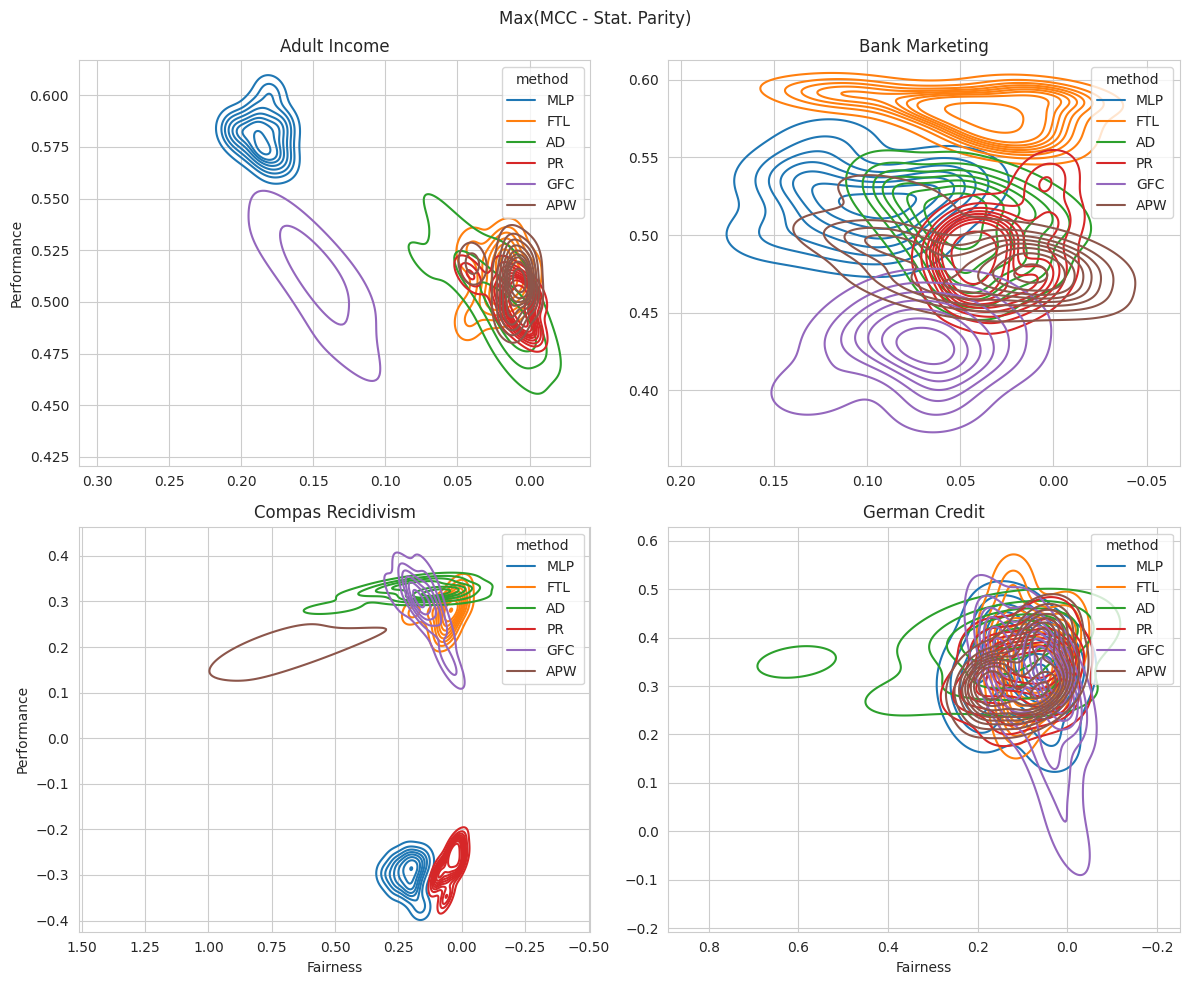

/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

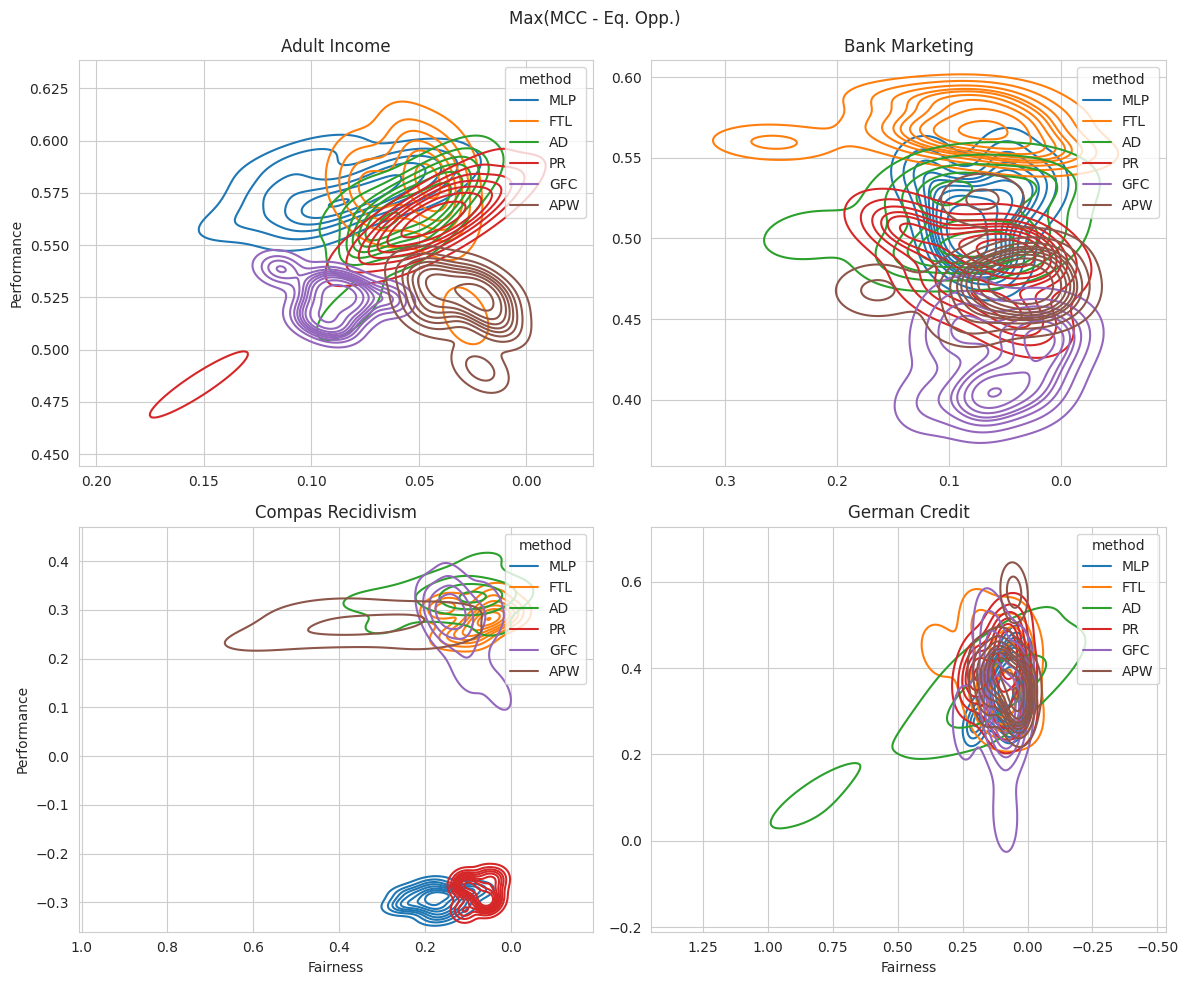

/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

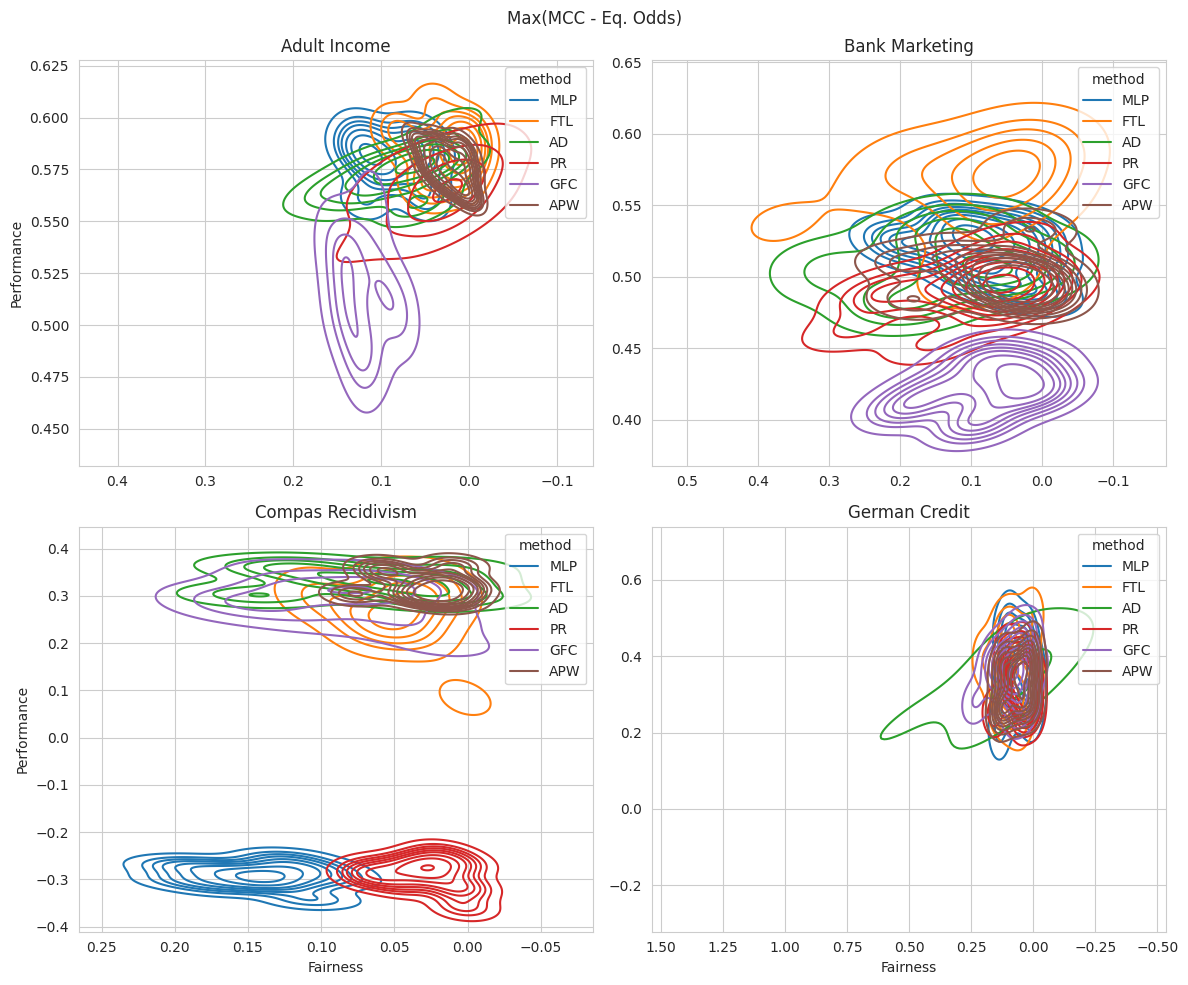

/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

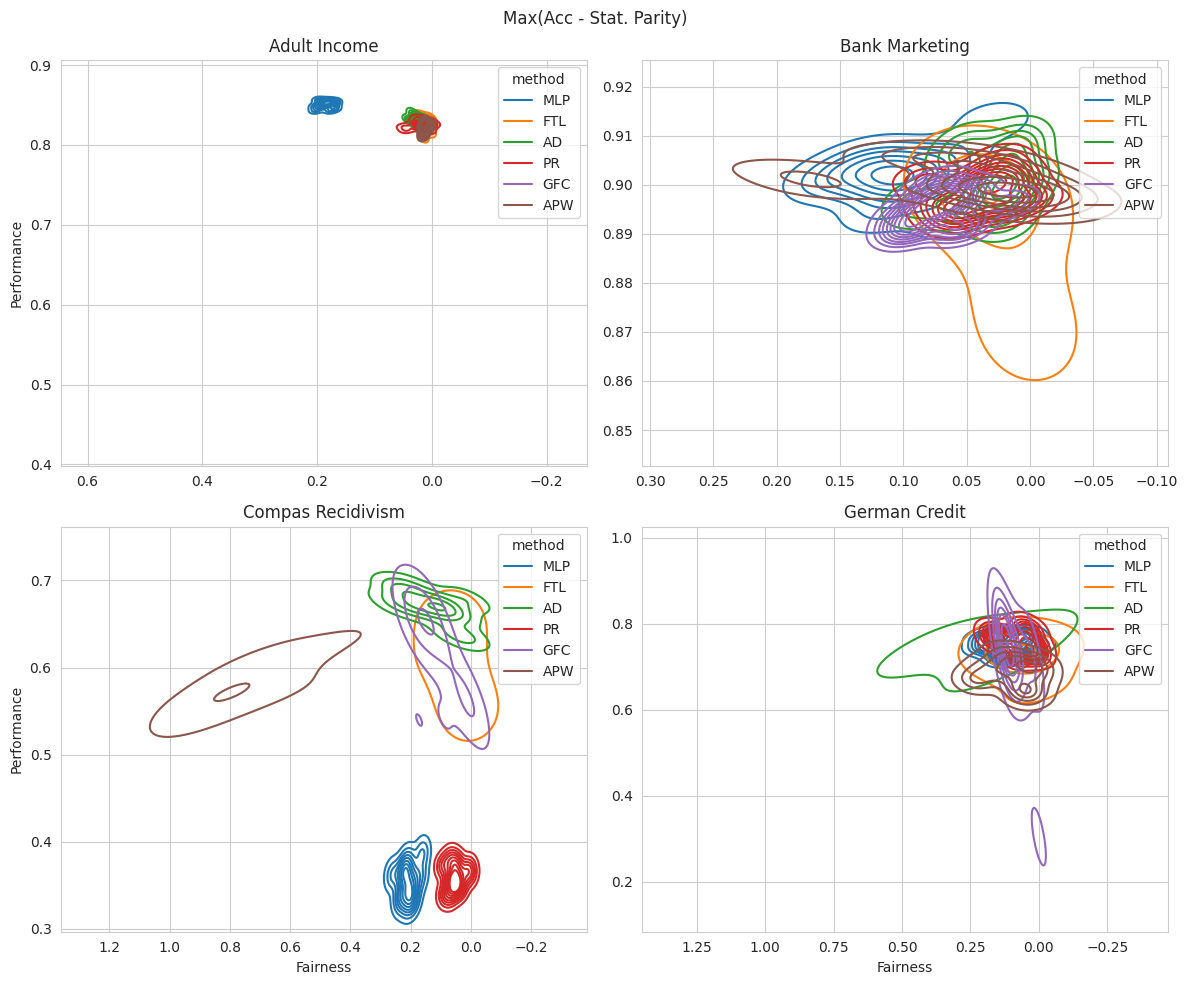

/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

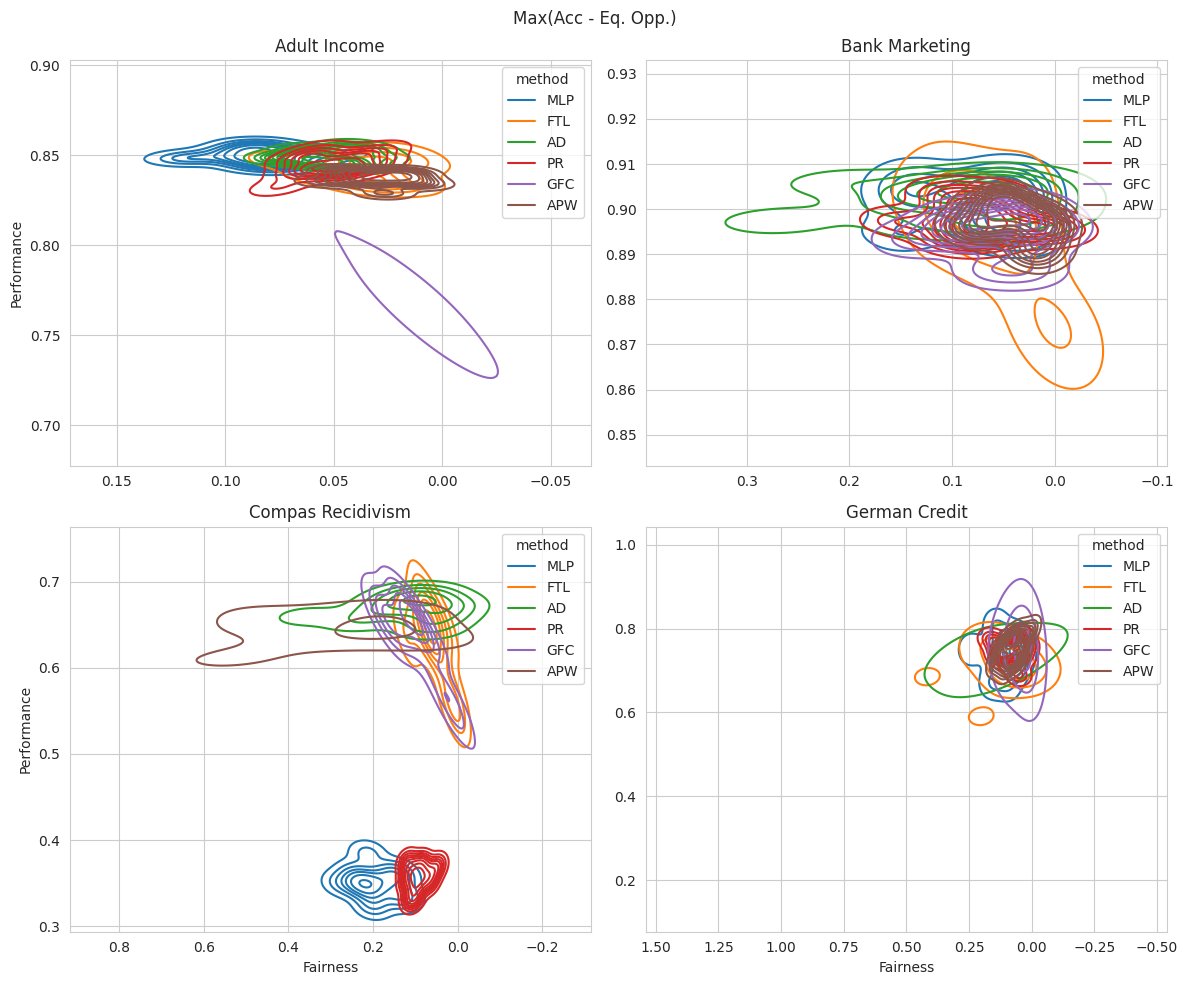

/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)
/tmp/ipykernel_3277278/1824207777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

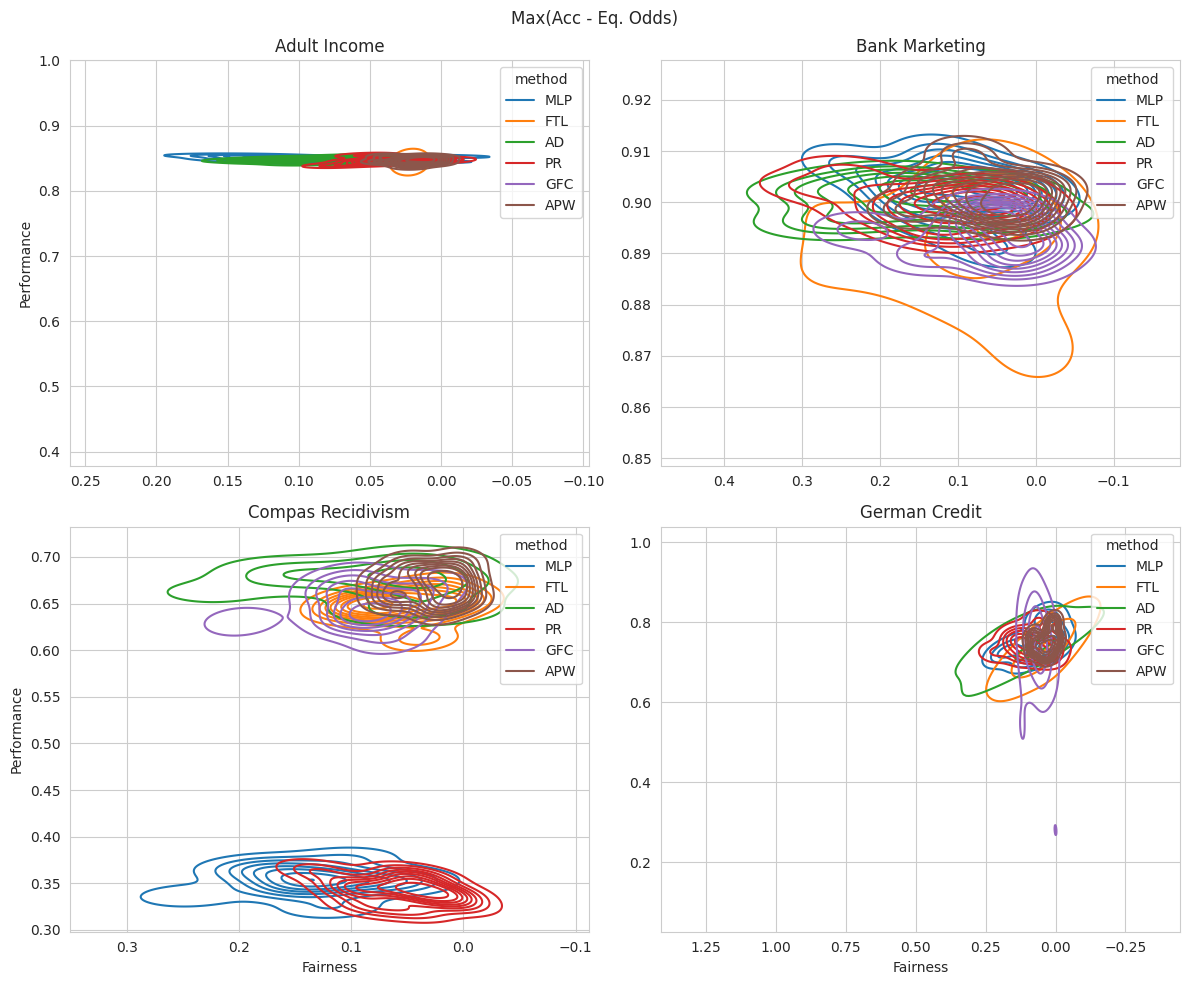

In [89]:
for fitness_rule in fitness_rules:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    fig.subplots_adjust(hspace=0.7)
    
    fig.suptitle(fitness_rules_abvr[fitness_rule])

    for dataset, ax in zip(sorted(datasets), axes.flatten()):
        by_fitness_rule = results[(results.fitness_rule == fitness_rule) & (results.dataset == dataset)]
        by_fitness_rule['method'] = pd.Categorical(by_fitness_rule['method'], categories=methods)

        # Sort by method and fitness, then take the top 5 rows for each method
        #by_fitness_rule = by_fitness_rule.groupby('method', group_keys=False).apply(lambda x: x.nlargest(5, 'fitness')).reset_index(drop=True)
        
        # Apply markers
        boxplot = sns.kdeplot(data=by_fitness_rule, hue='method', x='Fairness', y='Performance', ax=ax)
        
        ax.set_title(dataset)
        #ax.set_ylabel('')
        #ax.set_xlabel('')

        # Remove y-ticks from the second column
        if ax.get_subplotspec().colspan.start != 0:
            ax.set_ylabel('')

        # Remove x-ticks and labels from all but the last row
        if ax.get_subplotspec().rowspan.start != 1:
            ax.set_xlabel('')
            
        ax.invert_xaxis()

    # Set x-labels for the last row
    #axes[-1].set_xlabel('Fitness')
    
    plt.tight_layout()
    plt.savefig('plots/pareto_%s.pdf' % fitness_rule)
    plt.savefig('plots/pareto_%s.png' % fitness_rule)
    plt.show()
